In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [146]:
input_data_path = "../data/raw/train.csv"
df = pd.read_csv(input_data_path)
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [148]:
print(""" #### Null Check ####""")
print(df.isnull().sum())
print(""" #### Duplicate Check ####""")
print(df.duplicated().sum())

 #### Null Check ####
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
 #### Duplicate Check ####
0


Store              Axes(0.125,0.712609;0.168478x0.167391)
Weekly_Sales    Axes(0.327174,0.712609;0.168478x0.167391)
Holiday_Flag    Axes(0.529348,0.712609;0.168478x0.167391)
Temperature     Axes(0.731522,0.712609;0.168478x0.167391)
Fuel_Price         Axes(0.125,0.511739;0.168478x0.167391)
CPI             Axes(0.327174,0.511739;0.168478x0.167391)
Unemployment    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

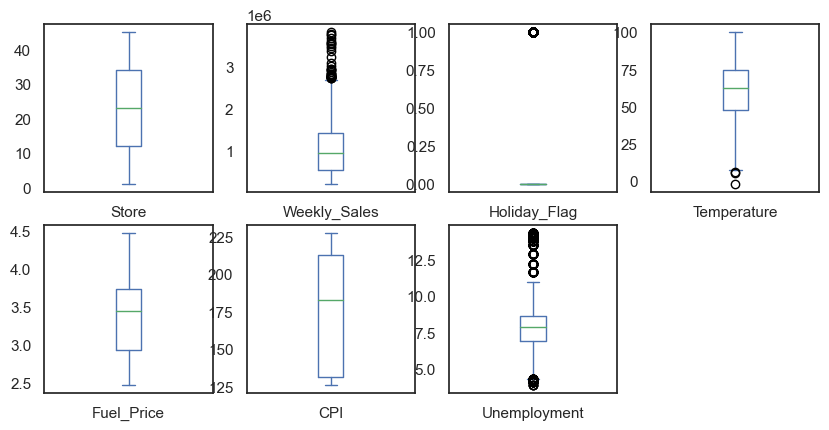

In [149]:
df.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

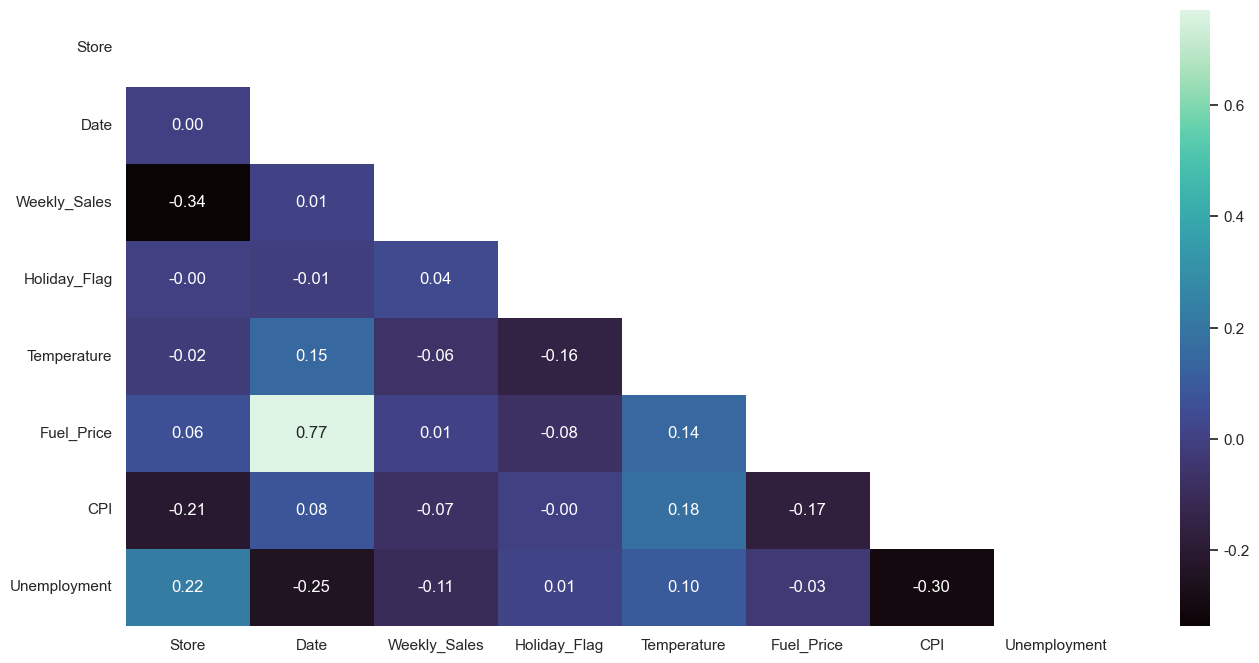

In [150]:
plt.figure(figsize=(16, 8))
sns.set(style="white") 

mask = np.triu(df.corr()) 
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap='mako', mask=mask)

plt.show()

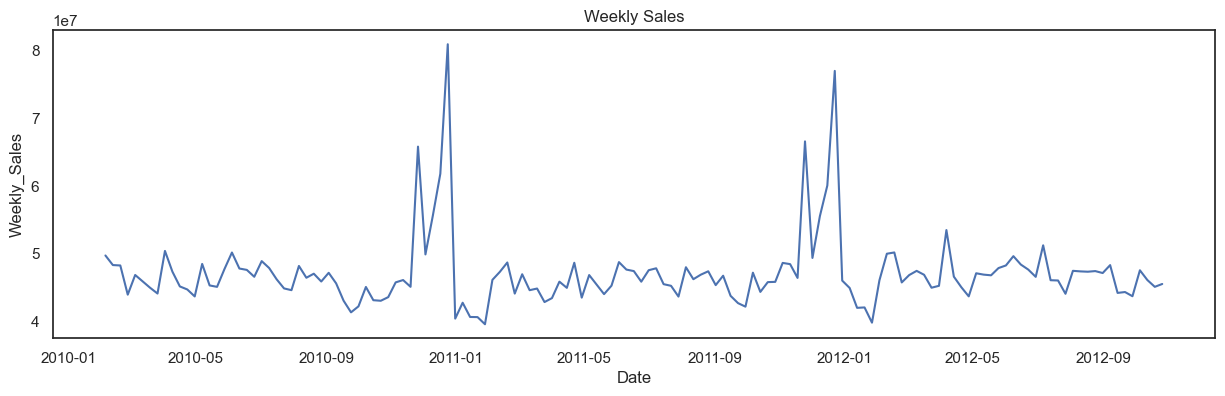

In [151]:
date_sales = df.groupby("Date")[["Weekly_Sales"]].sum().reset_index()

plt.figure(figsize=(15, 4))  
sns.lineplot(x='Date', y='Weekly_Sales', data=date_sales)
plt.title('Weekly Sales')
plt.show()

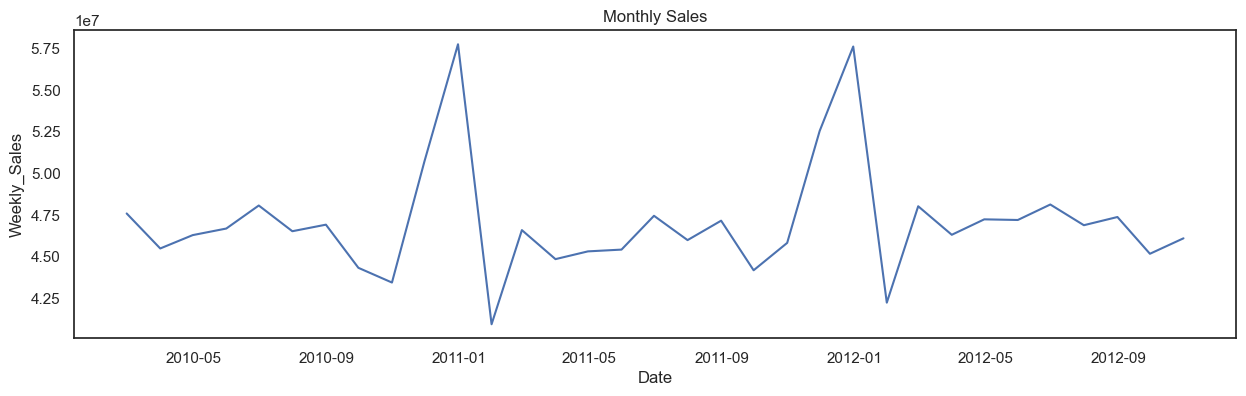

In [152]:
df_copy = df[['Date','Weekly_Sales']].copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'], dayfirst=True)
time_sales = df_copy.groupby("Date").sum()
time_sales1 = time_sales.copy()
time_sales1.reset_index(inplace=True)
sale_monthly = time_sales1.resample('M', on='Date').mean()
plt.figure(figsize=(15, 4))  
sns.lineplot(x='Date', y='Weekly_Sales', data=sale_monthly)
plt.title('Monthly Sales')
plt.show()

In [153]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    df_test = adfuller(timeseries['Weekly_Sales'], autolag='AIC')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

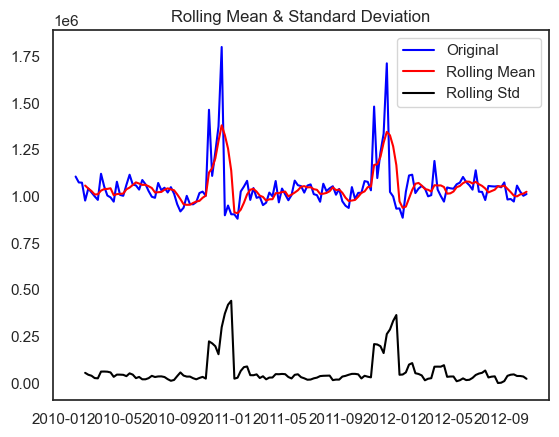

Results of Dickey Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [154]:
sales_group = df.groupby(['Date'])[['Weekly_Sales']].mean()
test_stationarity(sales_group)

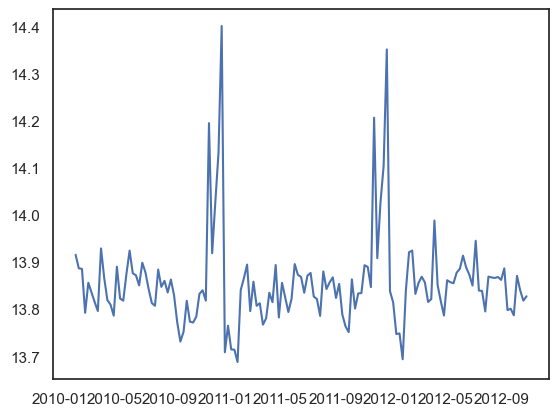

In [155]:
sales_group_log = np.log(sales_group)
plt.plot(sales_group_log)